In [1]:
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
plt.style.use('ggplot')

<Figure size 800x1000 with 0 Axes>

In [2]:
file = 'CVD_cleaned.csv'

In [3]:
df = pd.read_csv(file)
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


As we can see at cell 4, most features are categorical and not numerical. This type can lead to affecting the prediction itself. Lets change it to numerical / ordinal features

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Test the encoder

encoder = LabelEncoder()


In [8]:
features = ['General_Health','Checkup','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Sex','Age_Category','Smoking_History','Diabetes','Arthritis']

In [9]:
df2=df.copy()
for feature in features:
    df2[feature] = encoder.fit_transform(df[feature])

df2

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,0,1,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,3,1,0,0,0,0,2,0,1,9,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,4,0,1,0,0,0,1,3,0,0,2,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,4,4,1,0,0,0,0,0,0,1,9,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


In [10]:
encoder = LabelEncoder()

In [11]:
encoder.fit(df.General_Health).classes_

array(['Excellent', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int32  
 1   Checkup                       308854 non-null  int32  
 2   Exercise                      308854 non-null  int32  
 3   Heart_Disease                 308854 non-null  int32  
 4   Skin_Cancer                   308854 non-null  int32  
 5   Other_Cancer                  308854 non-null  int32  
 6   Depression                    308854 non-null  int32  
 7   Diabetes                      308854 non-null  int32  
 8   Arthritis                     308854 non-null  int32  
 9   Sex                           308854 non-null  int32  
 10  Age_Category                  308854 non-null  int32  
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

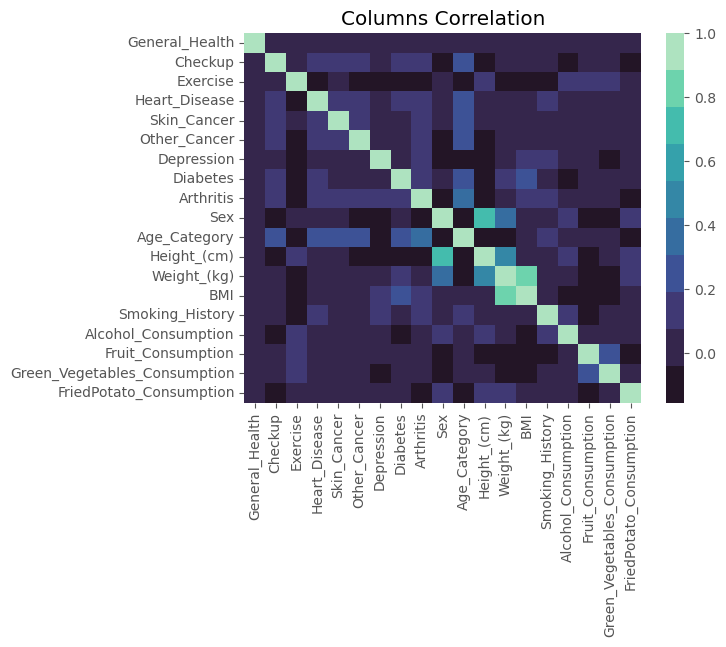

In [13]:
sb.heatmap(df2.corr(numeric_only=True),cmap=sb.color_palette("mako", 10))
plt.xticks(rotation =90)
plt.title('Columns Correlation')
plt.show()

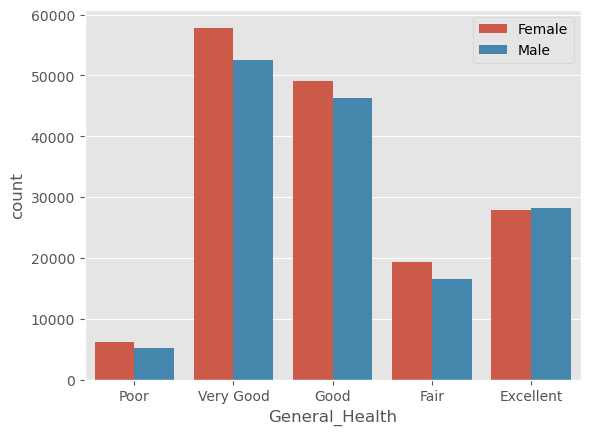

In [19]:
sb.countplot(data = df2,x=df.General_Health,hue=df2.Sex)
plt.legend(labels =encoder.fit(df.Sex).classes_)
plt.show()


- 0 For Females
- 1 For Males